# An analysis of the State of the Union speeches - Part 4

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter
import shelve

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 6)

Again, load data we need from previous parts without redoing that work.

## Distance between speeches

### By President

Let's first compute a few useful things we'll need later, like the unique set of all presidents and their initials (for plot labeling).

Now, make a dataframe that will contain the word counts aggregated by president:

In [3]:
all_speeches_df = pd.read_csv('data/speech_word_counts.csv')
wmat = all_speeches_df.transpose()
wmat = wmat[4:]
wmat

,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
guadalupe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acquittal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
review,0,0,0,0,0,0,3,0,0,0,...,0,0,0,1,0,0,0,0,0,0
extent,0,0,1,1,0,1,0,3,0,2,...,0,0,0,0,0,0,0,0,0,0
angular,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
new,1,0,4,2,2,2,1,4,0,1,...,25,21,20,36,27,25,29,41,19,18
cessation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
unchangeable,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
yarns,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pre_speeches_df = all_speeches_df.groupby(['President'],as_index=True)


#groupby president then sum

pmn_unnormalized = pre_speeches_df.agg('sum').transpose()
pmn_unnormalized.shape

(24845, 42)

In [5]:
def normalize(X):
    """Standardize a matrix X"""
    return((X / X.sum(0)))

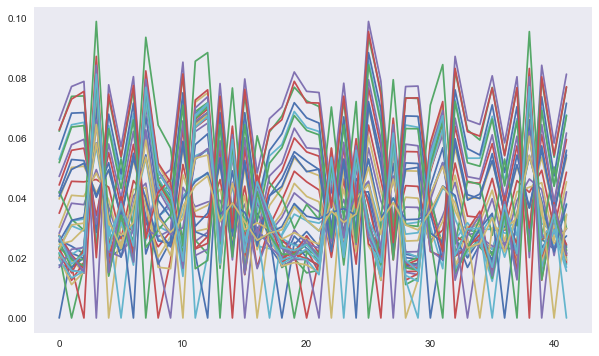

In [108]:
## Create distance matrix
pmn = normalize(pmn_unnormalized)
pmn.iloc[:,0] #first column
pmn.iloc[0] #First row
def distance_matrix(data, function):
    col_names = data.columns.values
    size = len(data.transpose()) 
    distance_mat = np.zeros(shape = (size, size))
    for i in range(0,size):
        for j in range(0,i):
            distance_mat[i, j] = function(data.iloc[:,i] - data.iloc[:,j])
            distance_mat[j, i] = function(data.iloc[:,i] - data.iloc[:,j])
    return(distance_mat)
euc_dis = distance_matrix(pmn, np.linalg.norm)
#distance_matrix(pmn, JSdiv)
plt.plot(euc_dis)


In [57]:


#debug
pmn.T

,guadalupe,858,acquittal,review,extent,angular,new,cessation,unchangeable,yarns,...,tractors,register,obamacare,rich,559,designer,resilience,bud,meriting,sands
President,,,,,,,,,,,,,,,,,,,,,
abraham lincoln,0.000000,0.000000,0.000000,0.000143,0.000358,0.000000,0.001718,0.000107,0.000036,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
andrew jackson,0.000000,0.000000,0.000000,0.000058,0.000409,0.000000,0.000982,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
andrew johnson,0.000000,0.000000,0.000000,0.000000,0.000207,0.000000,0.000749,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
barack obama,0.000000,0.000000,0.000000,0.000018,0.000000,0.000000,0.003928,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000126,0.000000,0.000000,0.000054,0.000000,0.000000,0.000000
benjamin harrison,0.000018,0.000000,0.000000,0.000072,0.000054,0.000000,0.001839,0.000000,0.000000,0.000000,...,0.000000,0.000036,0.000000,0.000036,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
calvin coolidge,0.000000,0.000000,0.000000,0.000038,0.000173,0.000000,0.001054,0.000000,0.000019,0.000000,...,0.000000,0.000000,0.000000,0.000038,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
chester a. arthur,0.000000,0.000000,0.000000,0.000000,0.000149,0.000000,0.000795,0.000050,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
donald j. trump,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003556,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dwight d. eisenhower,0.000000,0.000000,0.000000,0.000146,0.000091,0.000000,0.002841,0.000018,0.000000,0.000000,...,0.000018,0.000000,0.000000,0.000091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [40]:
# YOUR CODE HERE
#pres_mat.head()
??matplotlib

And `pmn` is a normalized version that turns counts into probability distributions:

In [ ]:
# YOUR CODE HERE
pmn.head()

Sanity check: all columns should sum to 1.

In [ ]:
pmn.sum()

Make a numpy array version to use with Scikit-Learn:

In [ ]:
from sklearn.preprocessing import normalize
pmn = normalize(pmn, norm='l1', axis=1)


In [ ]:
# YOUR CODE HERE
pmn.shape

You can use the JSdiv function below as-is, it already works.

In [26]:
from scipy.stats import entropy

def JSdiv(p, q):
    """Jensen-Shannon divergence.
    
    Compute the J-S divergence between two discrete probability distributions.
    
    Parameters
    ----------
    
    p, q : array
        Both p and q should be one-dimensional arrays that can be interpreted as discrete
        probability distributions (i.e. sum(p) == 1; this condition is not checked).
        
    Returns
    -------
    float
        The J-S divergence, computed using the scipy entropy function (with base 2) for
        the Kullback-Leibler divergence.
    """
    m = (p + q) / 2
    return (entropy(p, m, base=2.0) + entropy(q, m, base=2.0)) / 2

This is a "naive" plot where we use the $L^2$ distance to build the embedding.

In [106]:
from sklearn.manifold import MDS
from sklearn import manifold
# Initialize Euclidean distance
MDS = manifold.MDS(random_state=123)
# Transform to lower dimensional representation
lower_naive = MDS.fit_transform(euc_dis)
# A simple MDS embedding plot:
lower_naive

/Users/yakubakhmerov/anaconda/lib/python3.6/site-packages/sklearn/manifold/mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


array([[ 0.06656577,  0.01015587],
       [ 0.04768199,  0.07517635],
       [ 0.0713724 ,  0.06933802],
       [-0.1923925 , -0.1493713 ],
       [ 0.07578722,  0.05705922],
       [ 0.03090546, -0.03844982],
       [ 0.05344775,  0.06932653],
       [-0.16027316, -0.15437656],
       [-0.04923551, -0.06388571],
       [-0.00896991, -0.05456285],
       [ 0.04122723,  0.10290561],
       [-0.11086556, -0.14728748],
       [-0.11065068, -0.16563886],
       [ 0.05994632,  0.05428304],
       [-0.06774409, -0.12596299],
       [ 0.05604722,  0.08032164],
       [-0.04145648, -0.0452174 ],
       [ 0.04458559, -0.00803449],
       [ 0.06530699,  0.0314479 ],
       [ 0.03187678,  0.08724984],
       [ 0.03562552,  0.05680236],
       [ 0.05311206,  0.06024752],
       [-0.03711864, -0.10658288],
       [ 0.02046921,  0.07101025],
       [-0.08372747, -0.08209628],
       [-0.03022174,  0.13717009],
       [ 0.06095511,  0.07501064],
       [-0.09412871, -0.12231459],
       [ 0.08003822,

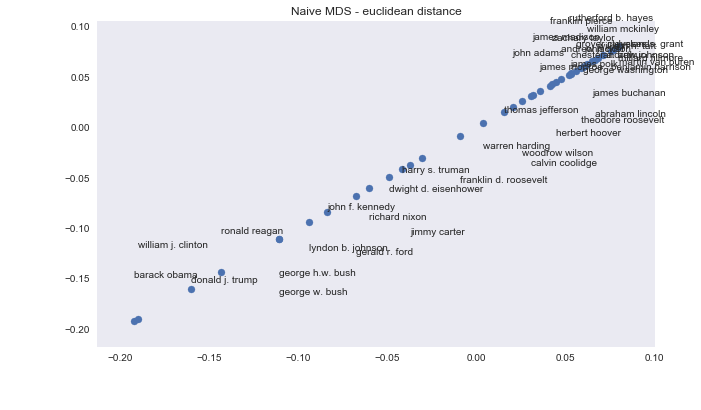

In [107]:
fig,ax=plt.subplots()
ax.scatter(lower_naive[:,0], lower_naive[:,0],)
ax.set_title('Naive MDS - euclidean distance')

for i, txt in enumerate(list(pmn.columns)):
    ax.annotate(txt, (lower_naive[i,0], lower_naive[i,1]))

This will be more informative if we make a little utility function for the plots, that carries a legend, annotates each point with the president's initials, and colors them all:

In [14]:
def plot_embedding(data, title='MDS Embedding', savepath=None, palette='viridis', 
                   size=7, annotate='initials'):
    """Plot an MDS embedding dataframe for all presidents.
    
    Uses Seaborn's `lmplot` to create an x-y scatterplot of the data, encoding the 
    value of the `President` field into the hue (which can be mapped to any desired
    color palette).
    
    Parameters
    ----------
    data : DataFrame
        A DataFrame that must contain 3 columns labeled 'x', 'y' and 'President'.
        
    title : optional, string
        Title for the plot
        
    savepath : optional, string
        If given, a path to save the figure into using matplotlib's `savefig`.
        
    palette : optional, string
        The name of a valid Seaborn palette for coloring the points.
    
    size : optional, float
        Size of the plot in inches (single number, square plot)
        
    annotate: optional, 'initials', 'name' or False
        If 'initials', annotate each point with the intials of each president,
        if 'name', use their last name, and if False, do not annotate at all.
        
    Returns
    -------
    FacetGrid
        The Seaborn FacetGrid object used to create the plot.
    """
    MDS_data = MDS(data)
    # YOUR CODE HERE
    

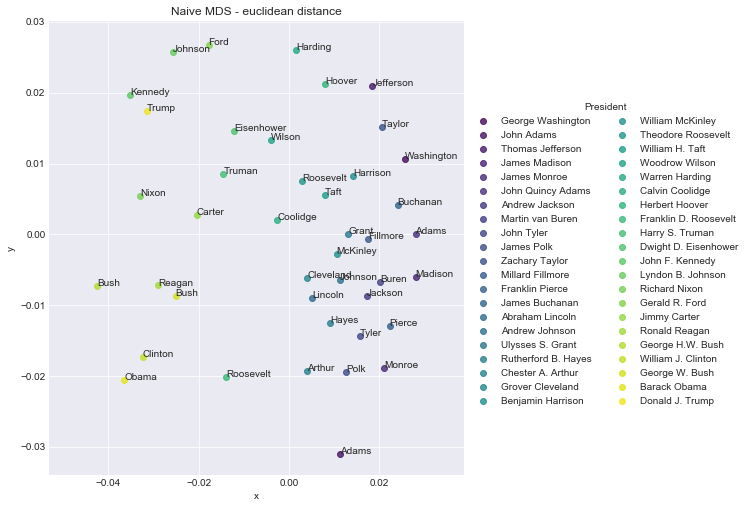

In [17]:
plot_embedding(embed_peu, 'Naive MDS - euclidean distance', 'fig/mds_naive.png', annotate='name');

Now we use a distance metric defined on probability mass functions, the Jensen-Shannon Metric.

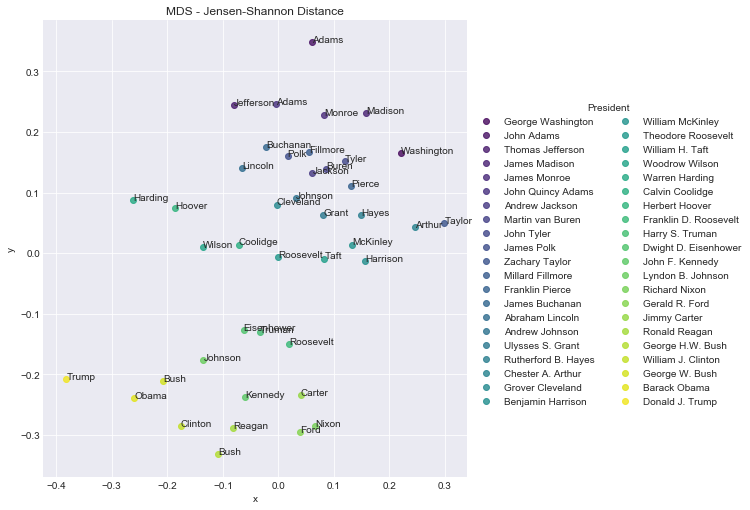

In [20]:
plot_embedding(edf2, 'MDS - Jensen-Shannon Distance', 'fig/mds_jsdiv.png', annotate='name');

### By Speech
First we normalize the term-document matrix

We make a similar naive plot embedding using the $L^2$ distance.

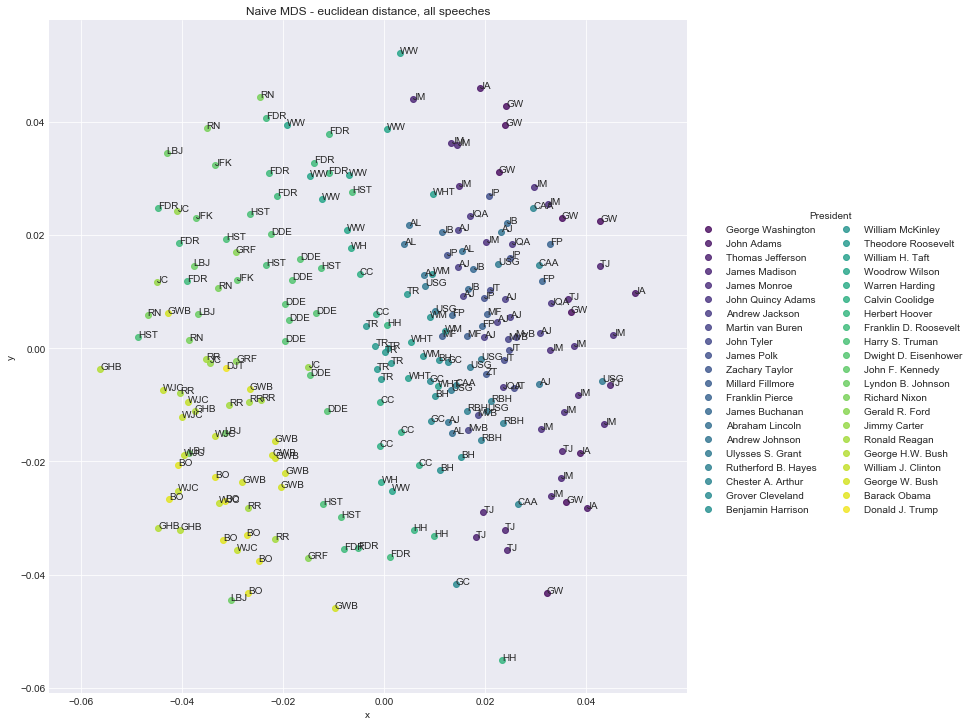

In [23]:
plot_embedding(embed_df, 'Naive MDS - euclidean distance, all speeches',
               'fig/mds_naive_all.png', size=10);

Now with the Jensen-Shannon metric

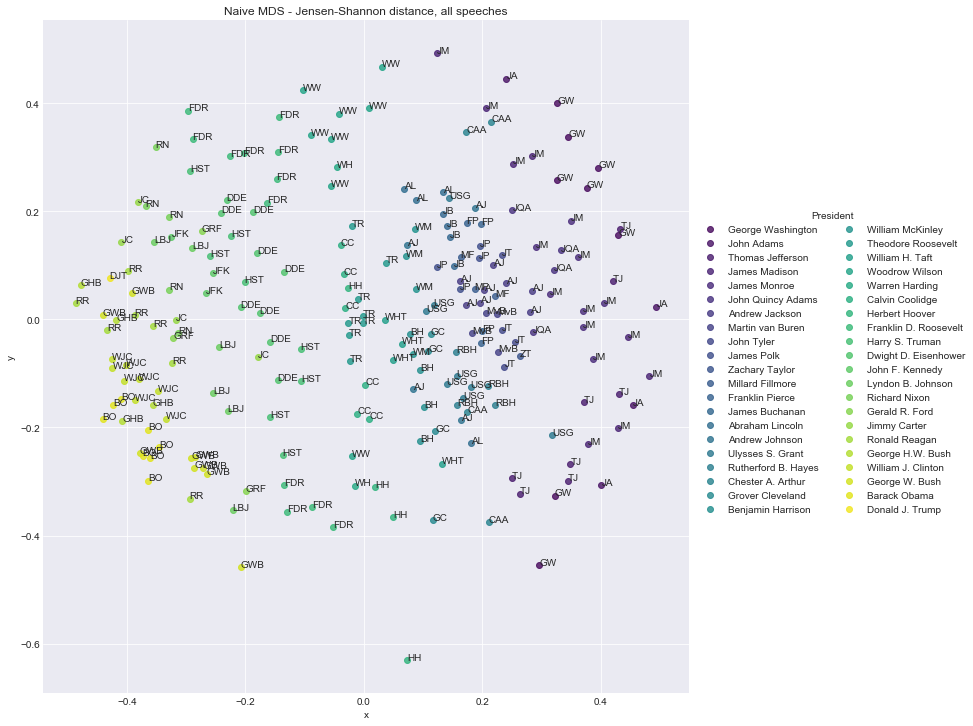

In [26]:
plot_embedding(embed_df2, 'Naive MDS - Jensen-Shannon distance, all speeches', 
               'fig/mds_jdsiv_all.png', size=10);

Store some final results. For native numpy arrays, we can use the convenient numpy `npz` container format, which behaves in practice similar to the Pandas HDF5 store and the Python Shelves:

In [27]:
np.savez('results/npa4.npz', pmm=pmm)